/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_70045/1326777521.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(original_file_path)


📊 Descriptive Statistics for Original vs. Outlier-Removed Dataset
  Statistic  Original Dataset  Outlier-Removed Dataset
0     count      1.811560e+05             1.568700e+05
1      mean      3.433412e+06             1.739182e+06
2       std      3.038475e+08             6.567609e+07
3       min      0.000000e+00             0.000000e+00
4       25%      7.100000e+01             4.700250e+01
5       50%      3.583000e+03             2.626620e+03
6       75%      5.386449e+04             3.954475e+04
7       max      1.210286e+11             2.144282e+10

📉 Standard Deviation of Scope 3 Emissions by Primary Activity
                          Primary Activity  Original Std Dev  \
82                    Health care services      1.082961e+06   
19                          Asset managers      3.075042e+07   
121  Non-residential building construction      2.711356e+07   
165        Real estate owners & developers      1.804944e+06   
61                    Electronic equipment      3.531861

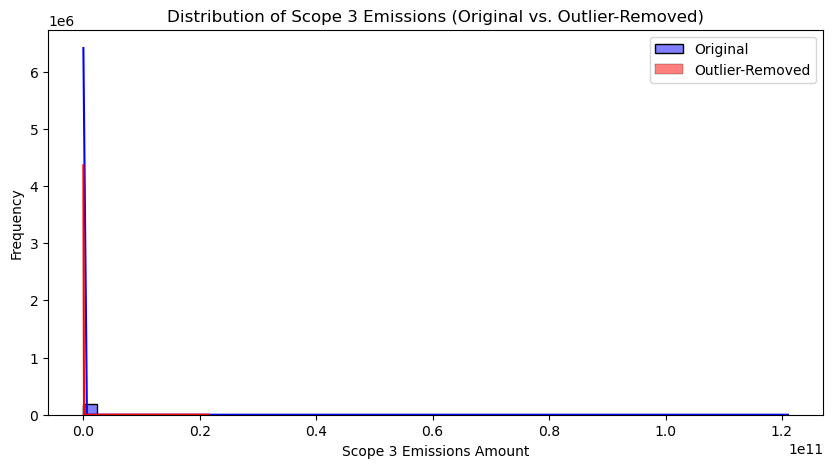


📌 Top 10 Primary Activities in Each Dataset:
  Primary Activity (Top 10 in Original)  Original Count  \
0                                 Banks            8605   
1                 Electronic components            5651   
2           Fabricated metal components            5577   
3           Telecommunications services            5187   
4                  Electrical equipment            4828   
5                   Specialty chemicals            4231   
6           Other professional services            4203   
7                             Insurance            3781   
8                  Electronic equipment            3734   
9                  Other base chemicals            3572   

  Primary Activity (Top 10 in Cleaned)  Cleaned Count  
0                                Banks           7794  
1          Fabricated metal components           5188  
2                Electronic components           4756  
3          Telecommunications services           4161  
4                 Electr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
original_file_path = "Mega_merged_all_real_values.csv"
df_original = pd.read_csv(original_file_path)

# Load the outliers dataset (from the normalized emissions analysis)
outliers_file_path = "all_outliers_combined_normalized.csv"
df_outliers = pd.read_csv(outliers_file_path)

# Remove all outlier companies from the original dataset
outlier_companies = df_outliers['account_id'].unique()
df_cleaned = df_original[~df_original['account_id'].isin(outlier_companies)]

# --- 1️⃣ Descriptive Statistics Comparison ---
print("📊 Descriptive Statistics for Original vs. Outlier-Removed Dataset")
desc_original = df_original["Scope_3_emissions_amount"].describe()
desc_cleaned = df_cleaned["Scope_3_emissions_amount"].describe()

comparison_desc = pd.DataFrame({
    "Statistic": desc_original.index,
    "Original Dataset": desc_original.values,
    "Outlier-Removed Dataset": desc_cleaned.values
})

print(comparison_desc)

# --- 2️⃣ Standard Deviation Change in Primary Activities ---
print("\n📉 Standard Deviation of Scope 3 Emissions by Primary Activity")

std_original = df_original.groupby("Primary activity")["Scope_3_emissions_amount"].std()
std_cleaned = df_cleaned.groupby("Primary activity")["Scope_3_emissions_amount"].std()

std_comparison = pd.DataFrame({
    "Primary Activity": std_original.index,
    "Original Std Dev": std_original.values,
    "Outlier-Removed Std Dev": std_cleaned.values
}).dropna()

std_comparison["% Change"] = ((std_comparison["Outlier-Removed Std Dev"] - std_comparison["Original Std Dev"]) / std_comparison["Original Std Dev"]) * 100

print(std_comparison.sort_values(by="% Change", ascending=False).head(10))  # Show top 10 changes

# --- 3️⃣ Impact on Total Scope 3 Emissions ---
total_emissions_original = df_original["Scope_3_emissions_amount"].sum()
total_emissions_cleaned = df_cleaned["Scope_3_emissions_amount"].sum()

print("\n💨 Total Scope 3 Emissions Comparison:")
print(f"Original Dataset: {total_emissions_original:,.0f}")
print(f"Outlier-Removed Dataset: {total_emissions_cleaned:,.0f}")
print(f"🔽 Change: {((total_emissions_cleaned - total_emissions_original) / total_emissions_original) * 100:.2f}%")

# --- 4️⃣ Visualizing Primary Activity Distributions ---
plt.figure(figsize=(10, 5))
sns.histplot(df_original["Scope_3_emissions_amount"], bins=50, color="blue", label="Original", kde=True, alpha=0.5)
sns.histplot(df_cleaned["Scope_3_emissions_amount"], bins=50, color="red", label="Outlier-Removed", kde=True, alpha=0.5)
plt.xlabel("Scope 3 Emissions Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Scope 3 Emissions (Original vs. Outlier-Removed)")
plt.legend()
plt.show()

# --- 5️⃣ Compare Primary Activity Counts ---
activity_counts_original = df_original["Primary activity"].value_counts().head(10)
activity_counts_cleaned = df_cleaned["Primary activity"].value_counts().head(10)

activity_comparison = pd.DataFrame({
    "Primary Activity (Top 10 in Original)": activity_counts_original.index,
    "Original Count": activity_counts_original.values,
    "Primary Activity (Top 10 in Cleaned)": activity_counts_cleaned.index,
    "Cleaned Count": activity_counts_cleaned.values
})

print("\n📌 Top 10 Primary Activities in Each Dataset:")
print(activity_comparison)

/var/folders/h7/9xqmfqgd45b8j4np0nndf6gw0000gn/T/ipykernel_70045/3106169061.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(original_file_path)


📊 Descriptive Statistics for Original vs. Outlier-Removed Dataset
  Statistic  Original Dataset  Outlier-Removed Dataset
0     count      1.811560e+05             1.489840e+05
1      mean      3.433412e+06             1.021892e+06
2       std      3.038475e+08             3.067704e+07
3       min      0.000000e+00             0.000000e+00
4       25%      7.100000e+01             4.000000e+01
5       50%      3.583000e+03             2.154000e+03
6       75%      5.386449e+04             2.986950e+04
7       max      1.210286e+11             9.544997e+09

📉 Standard Deviation of Scope 3 Emissions by Primary Activity
                    Primary Activity  Original Std Dev  \
14                Apparel & footwear      2.208959e+06   
142       Other renewable generation      3.590570e+06   
137      Other non-metallic minerals      2.752320e+07   
181           Solar energy equipment      2.328189e+08   
169                        Recycling      4.479312e+07   
6    Agricultural products w

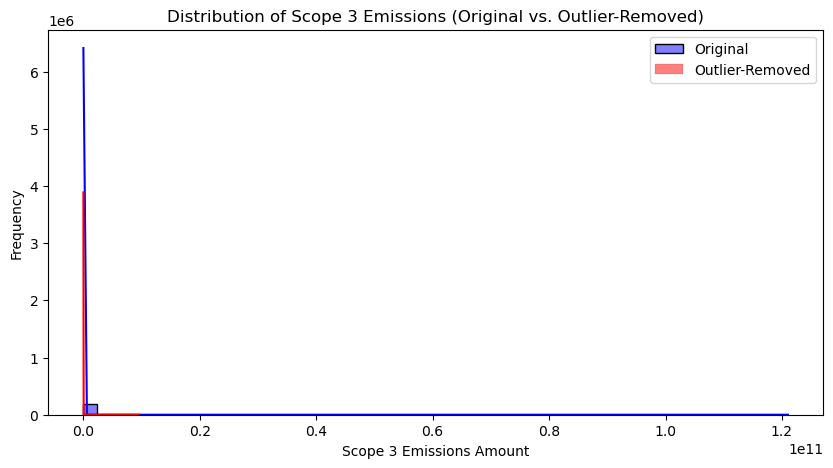


📌 Top 10 Primary Activities in Each Dataset:
  Primary Activity (Top 10 in Original)  Original Count  \
0                                 Banks            8605   
1                 Electronic components            5651   
2           Fabricated metal components            5577   
3           Telecommunications services            5187   
4                  Electrical equipment            4828   
5                   Specialty chemicals            4231   
6           Other professional services            4203   
7                             Insurance            3781   
8                  Electronic equipment            3734   
9                  Other base chemicals            3572   

  Primary Activity (Top 10 in Cleaned)  Cleaned Count  
0                                Banks           7653  
1                Electronic components           4995  
2          Fabricated metal components           4695  
3          Telecommunications services           4263  
4                 Electr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
original_file_path = "Mega_merged_all_real_values.csv"
df_original = pd.read_csv(original_file_path)

# Load the outliers dataset (from the normalized emissions analysis)
outliers_file_path = "all_outliers_combined_z2.csv"
df_outliers = pd.read_csv(outliers_file_path)

# Remove all outlier companies from the original dataset
outlier_companies = df_outliers['account_id'].unique()
df_cleaned = df_original[~df_original['account_id'].isin(outlier_companies)]

# --- 1️⃣ Descriptive Statistics Comparison ---
print("📊 Descriptive Statistics for Original vs. Outlier-Removed Dataset")
desc_original = df_original["Scope_3_emissions_amount"].describe()
desc_cleaned = df_cleaned["Scope_3_emissions_amount"].describe()

comparison_desc = pd.DataFrame({
    "Statistic": desc_original.index,
    "Original Dataset": desc_original.values,
    "Outlier-Removed Dataset": desc_cleaned.values
})

print(comparison_desc)

# --- 2️⃣ Standard Deviation Change in Primary Activities ---
print("\n📉 Standard Deviation of Scope 3 Emissions by Primary Activity")

std_original = df_original.groupby("Primary activity")["Scope_3_emissions_amount"].std()
std_cleaned = df_cleaned.groupby("Primary activity")["Scope_3_emissions_amount"].std()

std_comparison = pd.DataFrame({
    "Primary Activity": std_original.index,
    "Original Std Dev": std_original.values,
    "Outlier-Removed Std Dev": std_cleaned.values
}).dropna()

std_comparison["% Change"] = ((std_comparison["Outlier-Removed Std Dev"] - std_comparison["Original Std Dev"]) / std_comparison["Original Std Dev"]) * 100

print(std_comparison.sort_values(by="% Change", ascending=False).head(10))  # Show top 10 changes

# --- 3️⃣ Impact on Total Scope 3 Emissions ---
total_emissions_original = df_original["Scope_3_emissions_amount"].sum()
total_emissions_cleaned = df_cleaned["Scope_3_emissions_amount"].sum()

print("\n💨 Total Scope 3 Emissions Comparison:")
print(f"Original Dataset: {total_emissions_original:,.0f}")
print(f"Outlier-Removed Dataset: {total_emissions_cleaned:,.0f}")
print(f"🔽 Change: {((total_emissions_cleaned - total_emissions_original) / total_emissions_original) * 100:.2f}%")

# --- 4️⃣ Visualizing Primary Activity Distributions ---
plt.figure(figsize=(10, 5))
sns.histplot(df_original["Scope_3_emissions_amount"], bins=50, color="blue", label="Original", kde=True, alpha=0.5)
sns.histplot(df_cleaned["Scope_3_emissions_amount"], bins=50, color="red", label="Outlier-Removed", kde=True, alpha=0.5)
plt.xlabel("Scope 3 Emissions Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Scope 3 Emissions (Original vs. Outlier-Removed)")
plt.legend()
plt.show()

# --- 5️⃣ Compare Primary Activity Counts ---
activity_counts_original = df_original["Primary activity"].value_counts().head(10)
activity_counts_cleaned = df_cleaned["Primary activity"].value_counts().head(10)

activity_comparison = pd.DataFrame({
    "Primary Activity (Top 10 in Original)": activity_counts_original.index,
    "Original Count": activity_counts_original.values,
    "Primary Activity (Top 10 in Cleaned)": activity_counts_cleaned.index,
    "Cleaned Count": activity_counts_cleaned.values
})

print("\n📌 Top 10 Primary Activities in Each Dataset:")
print(activity_comparison)